Decription : This program gets the sentiment of Bitcoin from Twitter users
https://www.youtube.com/watch?v=XOdrsdhWpKE

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Twitter API anahtarlarınızı buraya girin
consumer_key = "YOUR_CONSUMER_KEY"
consumer_secret = "YOUR_CONSUMER_SECRET"
access_token = "YOUR_ACCESS_TOKEN"
access_token_secret = "YOUR_ACCESS_TOKEN_SECRET"

In [4]:
# Twitter API'ye bağlanmak
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True) 

In [5]:
# Bitcoin hakkında tweetleri çekmek
search_term='#bitcoin -filter:retweets'
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2018-11-01', tweet_mode='extended').items(2000)
all_tweets = [tweet.full_text for tweet in tweets]
#tweets = api.search(q="#Bitcoin", count=1000) 

In [6]:
df = pd.DataFrame(all_tweets, columns = ['Tweets'])
df.head(5)

,Tweets
0,@DocumentingBTC i like all that he represent a...
1,Click to Play: https://t.co/7AV9V1Ghfp !\n\n#m...
2,#BinanceCoin price update: $BNB\n\n#BNB $310.9...
3,Weekly 🚀\n\n#BTC Last $22878\n\n•Change since ...
4,88 My new #Bitcoin steel washer seed phrase wa...


In [7]:
def CleanTwt(twt): 
    twt = re.sub('#bitcoin', 'bitcoin', twt)
    twt = re.sub('#Bitcoin', 'Bitcoin', twt)
    #twt = re.sub('#BTC', 'BTC', twt)
    #twt = re.sub('#btc', 'btc', twt)
    twt = re.sub('#[A-Za-z0-9]+', '', twt)
    twt = re.sub('\\n', '', twt)
    twt = re.sub('https?:\/\/\S+', '', twt)
    return twt

In [8]:
df['Tweets_cleaned'] = df["Tweets"].apply(CleanTwt)
df.head()

,Tweets,Tweets_cleaned
0,@DocumentingBTC i like all that he represent a...,@DocumentingBTC i like all that he represent a...
1,Click to Play: https://t.co/7AV9V1Ghfp !\n\n#m...,Click to Play: ! Bitco...
2,#BinanceCoin price update: $BNB\n\n#BNB $310.9...,price update: $BNB $310.92 USDBitcoin 0.01358...
3,Weekly 🚀\n\n#BTC Last $22878\n\n•Change since ...,Weekly 🚀 Last $22878•Change since Monday 00h00...
4,88 My new #Bitcoin steel washer seed phrase wa...,88 My new Bitcoin steel washer seed phrase wal...


In [11]:
def getSUBjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

df["subjectivity"]=df["Tweets_cleaned"].apply(getSUBjectivity)
df["Polarity"]=df["Tweets_cleaned"].apply(getPolarity)

df.head()

,Tweets,Tweets_cleaned,subjectivity,Polarity
0,@DocumentingBTC i like all that he represent a...,@DocumentingBTC i like all that he represent a...,0.675000,0.750000
1,Click to Play: https://t.co/7AV9V1Ghfp !\n\n#m...,Click to Play: ! Bitco...,0.000000,0.000000
2,#BinanceCoin price update: $BNB\n\n#BNB $310.9...,price update: $BNB $310.92 USDBitcoin 0.01358...,0.250000,0.000000
3,Weekly 🚀\n\n#BTC Last $22878\n\n•Change since ...,Weekly 🚀 Last $22878•Change since Monday 00h00...,0.066667,0.000000
4,88 My new #Bitcoin steel washer seed phrase wa...,88 My new Bitcoin steel washer seed phrase wal...,0.372727,0.120707


In [12]:
def getsentiment(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

In [13]:
df["sentiment"]=df["Polarity"].apply(getsentiment)
df.head()

,Tweets,Tweets_cleaned,subjectivity,Polarity,sentiment
0,@DocumentingBTC i like all that he represent a...,@DocumentingBTC i like all that he represent a...,0.675000,0.750000,Positive
1,Click to Play: https://t.co/7AV9V1Ghfp !\n\n#m...,Click to Play: ! Bitco...,0.000000,0.000000,Neutral
2,#BinanceCoin price update: $BNB\n\n#BNB $310.9...,price update: $BNB $310.92 USDBitcoin 0.01358...,0.250000,0.000000,Neutral
3,Weekly 🚀\n\n#BTC Last $22878\n\n•Change since ...,Weekly 🚀 Last $22878•Change since Monday 00h00...,0.066667,0.000000,Neutral
4,88 My new #Bitcoin steel washer seed phrase wa...,88 My new Bitcoin steel washer seed phrase wal...,0.372727,0.120707,Positive


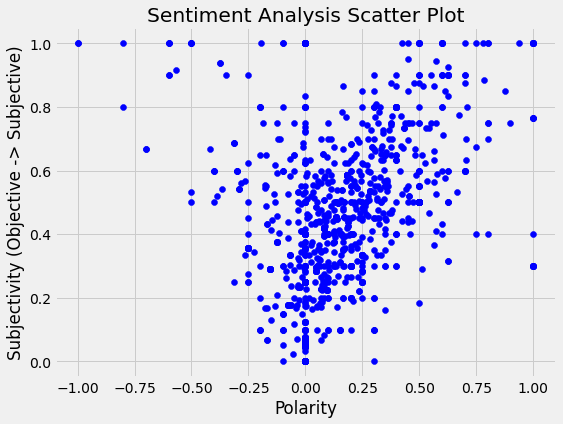

In [17]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['subjectivity'][i],color='blue')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (Objective -> Subjective)')
plt.show()

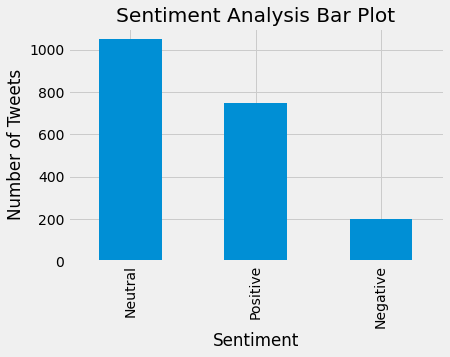

In [18]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()